<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/notebook/ch07_MLP%26Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## mini_batch

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

data_size = x_train.shape[0]
batch_size = 12	# 배치 크기

selected = np.random.choice(data_size, batch_size)
print(selected)
x_batch = x_train[selected]
y_batch = y_train[selected]

11490434/11490434 [==============================] - 0s 0us/step
[14123 16063 30240 22534 19670 40512 33786  7501 11760  7197 54047 53608]


## MLP_mini_batch_XOR

In [ ]:
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # (4,2)
T = np.array([[0], [1], [1], [0]])              # (4,1)

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1    # (2,2)
W2 = 2*np.random.random((hiddens, outputs))-1   # (2,1)
B1 = np.zeros(hiddens)                          # (2,)
B2 = np.zeros(outputs)                          # (1,)
print(W1.shape,W2.shape,B1.shape,B2.shape)


(2, 2) (2, 1) (2,) (1,)


In [ ]:
# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(2):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T
            #print(layer0.shape,layer1.shape,layer2.shape)
            
            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            # print(layer2_error.shape)
            # print(layer2_delta.shape)
            # print(layer1_error.shape)
            # print(layer1_delta.shape)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0  # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0



In [ ]:
def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

(4, 2) (4, 2) (4, 1)
(4, 1)
(4, 1)
(4, 2)
(4, 2)
(4, 2) (4, 2) (4, 1)
(4, 1)
(4, 1)
(4, 2)
(4, 2)
[[0 0]] [0] [[0.569467]]
[[0 1]] [1] [[0.55780776]]
[[1 0]] [1] [[0.53634036]]
[[1 1]] [0] [[0.52755135]]


## Keras_XOR

In [ ]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #①
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #②		
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(lr=0.3)) 

model.summary()
 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=100) #10000

print(model.predict(X))

# 정상 결과값
# [[0.0156148 ]
#  [0.98538893]
#  [0.9820687 ]
#  [0.01398213]]

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.3016
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3006
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3001
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2997
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2992
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2987
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2982
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2977
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2973
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2968
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2963
Epoch 13/100
4/4 [==============================] - 0s 11ms/s

## Keras_XOR_MLP_H2

- 위 Keras_XOR이랑 달리 은닉층을 하나 더 생성

In [ ]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #①
model.add(tf.keras.layers.Dense(units=4, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.3)) 

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [ ]:

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=100) # epochs를 횟수를 많이 올려야 정확도가 올라감

print(model.predict(X))

# 정상 결과값
# [[0.00956685]
#  [0.9900732 ]
#  [0.9919224 ]
#  [0.00822851]]

Epoch 1/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2721
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2718
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2714
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2710
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2706
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2703
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2699
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2695
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2692
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2689
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2685
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2682
Epoch 13/100
4/4 [==============================] - 0s 10ms/s

## Keras  사용하는 3가지 방법

1. Sequential 모델을 만들고 모델에 필요한 레이어를 추가하는 방법
2. 함수형 API를 사용하는 방법
3. Model 클래스를 상속받아서 우리 나름대로 클래스를 정의하는 방법

### Sequential 모델을 만들고 모델에 필요한 레이어를 추가하는 방법

In [ ]:
model = Sequential()
model.add(Dense(units=2, input_shape=(2,), activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

### 함수형 API를 사용하는 방법

In [ ]:
inputs = Input(shape=(2,)) # 입력층
x = Dense(2, activation="sigmoid")(inputs) # 은닉층 1
prediction = Dense(1, activation="sigmoid")(x) # 출력층
model = Model(inputs=inputs, outputs=prediction)

### Model 클래스를 상속받아서 우리 나름대로 클래스를 정의하는 방법

In [ ]:
class SimpleMLP(Model):
  def __init__(self, num_classes): # 생성자 작성
    super(SimpleMLP, self).__init__(name='mlp')
    self.num_classes = num_classes
    self.dense1 = Dense(32, activation='sigmoid')
    self.dense2 = Dense(num_classes, activation='sigmoid')
  def call(self, inputs): # 순방향 호출을 구현한다.
    x = self.dense1(inputs)
    return self.dense2(x)
model = SimpleMLP()
model.compile(...)
model.fit(...)

## Keras_mnist_A_softmax

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

print(train_labels)
print(test_images.shape)


(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


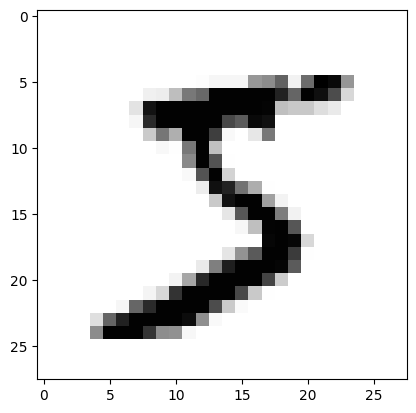

In [ ]:

plt.imshow(train_images[0], cmap="Greys")
plt.show()



In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])            

#
# dataset: train, test 데이터 전처리
#
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# training
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.0191 - accuracy: 0.8815
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0099 - accuracy: 0.9386
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0077 - accuracy: 0.9528
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0062 - accuracy: 0.9621
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0053 - accuracy: 0.9693


In [ ]:

# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0054 - accuracy: 0.9659
테스트 정확도: 0.9659000039100647


Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0046 - accuracy: 0.9736
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0041 - accuracy: 0.9766
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0036 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0032 - accuracy: 0.9821
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0029 - accuracy: 0.9842


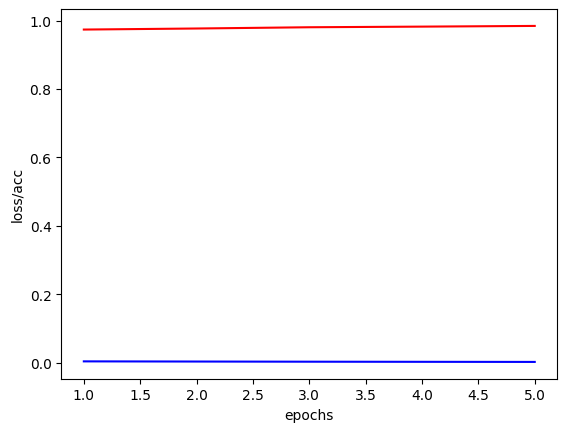

In [ ]:

# Training again with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


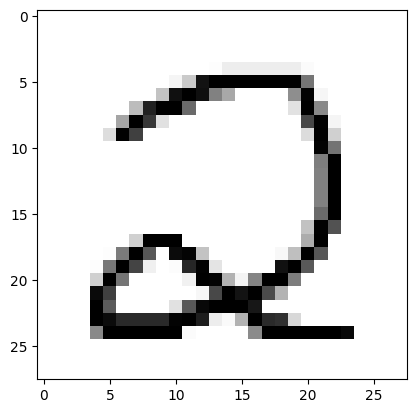

In [ ]:

import cv2 as cv

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/dle/dl-express-src/chap07/test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
# plt.imshow(image.reshape(28, 28),cmap='Greys')
# plt.show()
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()


In [ ]:

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())
print(np.sum(pred))

# ref.
# https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/
#


1/1 [==============================] - 0s 56ms/step
추정된 숫자= 2
1.0


## Keras_mnist_M1Sequential

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


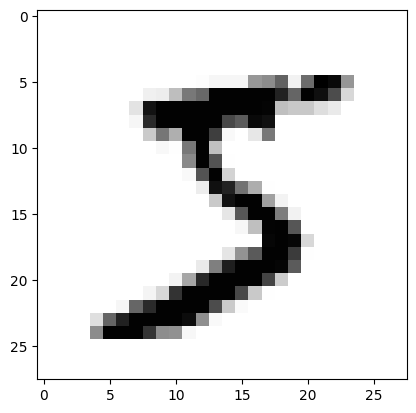

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

print(train_labels)
print(test_images.shape)

plt.imshow(train_images[0], cmap="Greys")
plt.show()


In [ ]:

#
# Model1 - Sequential
#
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])            


In [ ]:

#
# dataset: train, test
#
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# training
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0254 - accuracy: 0.8743
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0128 - accuracy: 0.9313
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0101 - accuracy: 0.9456
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0085 - accuracy: 0.9550
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0074 - accuracy: 0.9612


In [ ]:

# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9633
테스트 정확도: 0.9632999897003174


Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0065 - accuracy: 0.9660
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0059 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0054 - accuracy: 0.9726
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0050 - accuracy: 0.9757
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0046 - accuracy: 0.9774


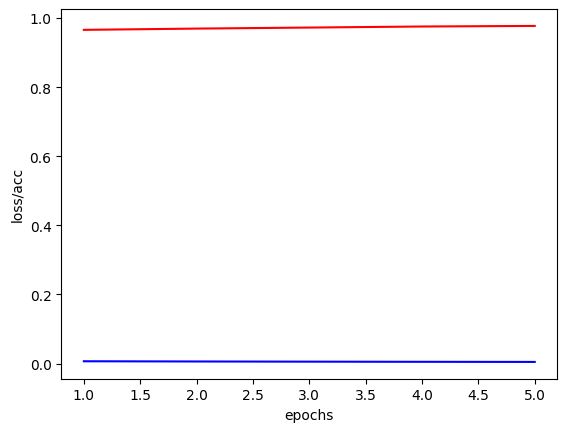

In [ ]:

# Training again with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


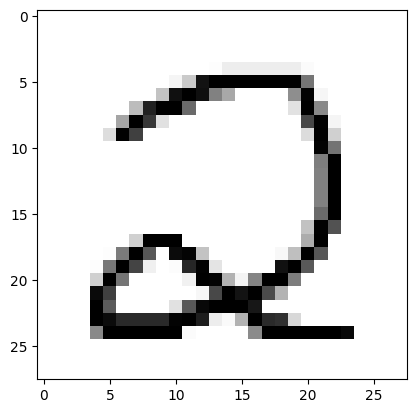

In [ ]:

import cv2 as cv

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/dle/dl-express-src/chap07/test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
# plt.imshow(image.reshape(28, 28),cmap='Greys')
# plt.show()
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()


In [ ]:

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())
print(np.sum(pred))
#
# https://www.tensorflow.org/datasets/keras_example
#


1/1 [==============================] - 1s 644ms/step
추정된 숫자= 2
0.8167477


## Keras_mnist_M2Ftn

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

print(train_labels)
print(test_images.shape)


(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


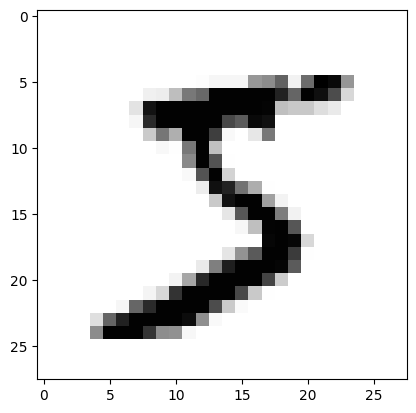

In [ ]:

plt.imshow(train_images[0], cmap="Greys")
plt.show()


In [ ]:

#
# Model2 - Functional
#

inputs = layers.Input(shape=(784,))

x = layers.Dense(512, activation='relu')(inputs)
output = layers.Dense(10, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])            


In [ ]:

#
# dataset: train, test
#
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# training
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0256 - accuracy: 0.8711
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0130 - accuracy: 0.9301
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0103 - accuracy: 0.9442
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0087 - accuracy: 0.9535
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0075 - accuracy: 0.9603


In [ ]:

# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0072 - accuracy: 0.9626
테스트 정확도: 0.9625999927520752


Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0067 - accuracy: 0.9649
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0060 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0055 - accuracy: 0.9722
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0051 - accuracy: 0.9746
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0047 - accuracy: 0.9769


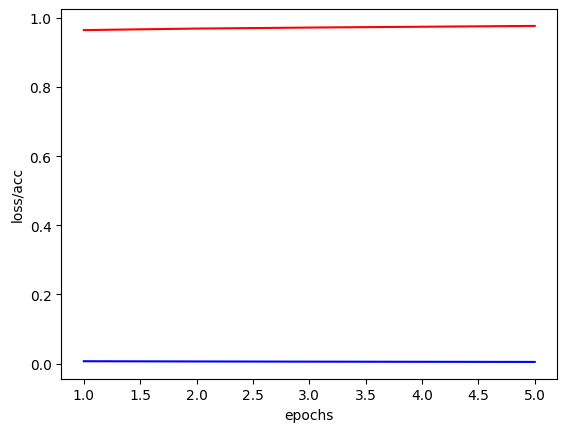

In [ ]:

# Training again with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


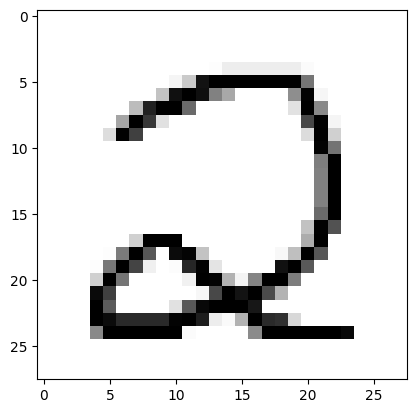

In [ ]:

import cv2 as cv

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/dle/dl-express-src/chap07/test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
# plt.imshow(image.reshape(28, 28),cmap='Greys')
# plt.show()
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()


In [ ]:

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())
print(np.sum(pred))


1/1 [==============================] - 0s 237ms/step
추정된 숫자= 2
1.0285016


## Keras_mnist_M3Class

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

print(train_images.shape)

print(train_labels)
print(test_images.shape)


(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


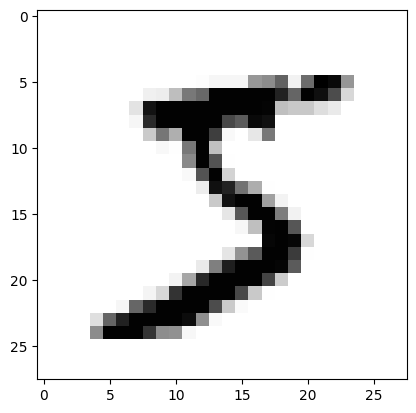

In [ ]:

plt.imshow(train_images[0], cmap="Greys")
plt.show()


In [ ]:

#
# Model3 - Class
#

class MnistMLP(models.Model):
    
    def __init__(self, num_classes):
        super(MnistMLP, self).__init__(name='mlp')
        self.num_classes = num_classes
        
        self.dense1 = layers.Dense(512, activation='relu')
        self.dense2 = layers.Dense(10, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)


In [ ]:
    
# model
model = MnistMLP(num_classes=10)

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])            


In [ ]:

#
# dataset: train, test
#
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# training
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0255 - accuracy: 0.8734
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0129 - accuracy: 0.9316
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0102 - accuracy: 0.9458
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0086 - accuracy: 0.9542
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0075 - accuracy: 0.9603


In [ ]:

# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9609
테스트 정확도: 0.9609000086784363


Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0066 - accuracy: 0.9657
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0060 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0055 - accuracy: 0.9723
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0050 - accuracy: 0.9748
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0047 - accuracy: 0.9767


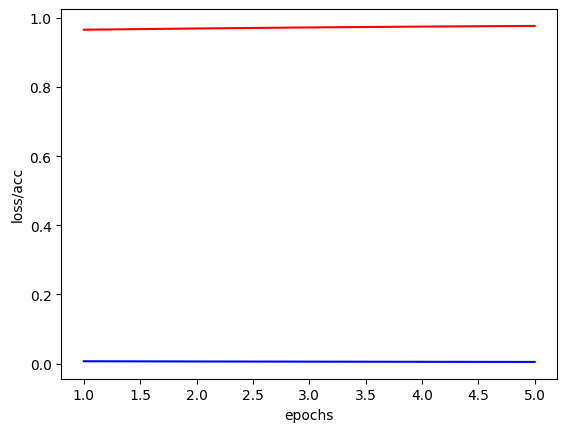

In [ ]:

# Training again with history
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


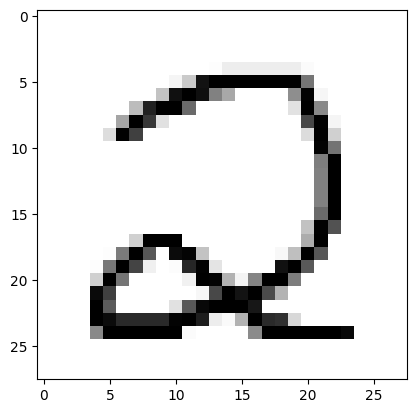

In [ ]:

import cv2 as cv

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/dle/dl-express-src/chap07/test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
# plt.imshow(image.reshape(28, 28),cmap='Greys')
# plt.show()
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()


In [ ]:

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())
print(np.sum(pred))


1/1 [==============================] - 0s 55ms/step
추정된 숫자= 2
1.2369281


## keras의 클래스

- 모델: 하나의 신경망을 나타낸다.
- 레이어: 신경망에서 하나의 층이다.
- 입력 데이터: 텐서플로우 텐서 형식이다.
- 손실 함수: 신경망의 출력과 정답 레이블 간의 차이를 측정하는 함수이다.
- 옵티마이저: 학습을 수행하는 최적화 알고리즘이다. 학습률과 모멘텀을 동적으로 변경한다

## Sequential model

- add(layer): 레이어를 모델에 추가한다.
- compile(optimizer, loss=None, metrics=None): 훈련을 위해서 모델을 구성하는 메소드
- fit(x=None, y=None, batch_size=None, epochs=1, verbose=1): 훈련 메소드
- evaluate(x=None, y=None): 테스트 모드에서 모델의 손실 함수 값과 측정 항목 값을 반환
- predict(x, batch_size=None): 입력 샘플에 대한 예측값을 생성

## 활성화 함수

- sigmoid
- relu(Rectified Linear Unit)
- softmax
- tanh
- selu(Scaled Exponential Linear Unit)
- Softplus
- gelu (Gaussian Error Linear Unit)

----

## 하이퍼 매개변수 (hyperparameter)

- 학습률이나 은닉층을 몇 개로 정할 것인지, 은닉층의 개수나 유닛의 개수를 정하는 변수

### 하이퍼 매개변수 설정

- 기본값
- 수동 검색 : 사용자가 하이퍼 매개변수 지정
- 그리드 검색 : 격자 형태로 하이퍼 매개변수를 변경하면서 성능을 측정하는 방법(sklearn 패키지 제공)
- 랜덤 검색

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# 신경망 모델 구축
def build_model():
  network = tf.keras.models.Sequential()
  network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  network.add(tf.keras.layers.Dense(10, activation='sigmoid'))
  network.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

  return network
# 하이퍼 매개변수 딕셔너리
param_grid = {
'epochs':[1, 2, 3], # 에포크 수: 1, 2, 3
'batch_size':[32, 64] # 배치 크기: 32, 64
}

In [8]:
# 케라스 모델을 KerasClassifier를 사용해서 포장한다.
model = KerasClassifier(build_fn = build_model, verbose=1)
# 그리드 검색
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
# 그리드 검색 결과 출력
grid_result = gs.fit(train_images, train_labels)
print(grid_result.best_score_)
print(grid_result.best_params_)

<ipython-input-8-e3913379147c>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = build_model, verbose=1)


Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2023 - accuracy: 0.9400
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0853 - accuracy: 0.9744
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0611 - accuracy: 0.9825
0.9705666502316793
{'batch_size': 32, 'epochs': 3}


### grid search_A

In [ ]:
# import numpy as np 
# import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
# OS warning cure
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
             

In [ ]:
                
# 신경망 모델 구축
def build_model():
    network = tf.keras.models.Sequential()
    network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

# 하이퍼 매개변수 딕셔너리
param_grid = {
              'epochs':[1, 2, 3],	# 에포크 수: 1, 2, 3
              'batch_size':[32, 64, 100]	# 배치 크기: 32, 64, 100
             }


In [ ]:

# 케라스 모델을 scikeras에서 사용하도록 포장한다. 
model = KerasClassifier(model = build_model, verbose=1)

## Elapsed time start
import time
start = time.time()

# 그리드 검색
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=3, 
    # n_jobs=-1 # comment this line to avoid out-of-memory
)

# 그리드 검색 결과 출력
grid_result = gs.fit(train_images, train_labels)

## Elapsed time end
end = time.time()
print('Elapsed time:', end - start) # Elapsed time: 122.5, 189.5

print(grid_result.best_score_) # 0.9725, 0.9711
print(grid_result.best_params_) # {'batch_size': 64, 'epochs': 3}
